<a href="https://colab.research.google.com/github/podobongbong/the_project/blob/main/Nov18_data_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/podobongbong/the_project.git
import os
os.chdir('/content/the_project')
import pandas as pd


fatal: destination path 'the_project' already exists and is not an empty directory.


In [ ]:

# Energy Data (2004-2023)
energy_data = pd.read_csv('energy.csv')
energy_data.columns = ['year','city','district','type','jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

#주택용
energy_data = energy_data[energy_data['type']=='주택용']
monthly_columns = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
aggregated_data = energy_data.groupby(['year','city'])[monthly_columns].sum().reset_index()

energy_data['city'] = energy_data['city'].replace({'서울특별시': 'seoul', '부산광역시': 'busan'})
aggregated_energy_data = energy_data.groupby(['year', 'city'])[monthly_columns].sum().reset_index()

energy_seoul = aggregated_energy_data[aggregated_energy_data['city'] == 'seoul']
energy_busan = aggregated_energy_data[aggregated_energy_data['city'] == 'busan']


In [ ]:
# Population Data (2008-2023)
population_data = pd.read_csv('/content/the_project/population.csv')
population_data.columns = ['year', 'city', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
population_data['city'] = population_data['city'].replace({'seoul': 'seoul', 'busan': 'busan'})


In [ ]:

# Cliamte Data (2004-2023)
climate_busan = pd.read_csv('/content/the_project/climate_busan.csv')
climate_seoul = pd.read_csv('/content/the_project/climate_seoul.csv')
climate_data = pd.concat([climate_busan, climate_seoul], ignore_index=True)
df= climate_data.copy()

df['temp_range'] = df['high'] - df['low']
df['high_deviation'] = df['high'] - df['average']
df['low_deviation'] = df['average'] - df['low']
df = df.dropna()

## Climate feature selection: Primary Component Analysis
from sklearn.decomposition import PCA
import pandas as pd
climate_vars = df[['average', 'low', 'high', 'temp_range','high_deviation','low_deviation']]
climate_vars = climate_vars.dropna()

## Apply PCA to reduce to 1 or 2 components
pca = PCA(n_components=1)  # Adjust to 1 or 2 based on analysis
climate_pca = pca.fit_transform(climate_vars)
df['climate_summary'] = climate_pca[:, 0]  # Only the first component
df['city'] = df['station'].replace({108: 'seoul', 159: 'busan'})
df['city'] = df['city'].astype(str)

climate = df[['ym','city','climate_summary']]

In [ ]:

e_seoul = energy_seoul[monthly_columns].values.flatten().reshape(-1, 1)
e_busan = energy_busan[monthly_columns].values.flatten().reshape(-1, 1)

p_seoul = population_data[population_data['city'] == 'seoul'][monthly_columns].values.flatten().reshape(-1, 1)
p_busan = population_data[population_data['city'] == 'busan'][monthly_columns].values.flatten().reshape(-1, 1)


In [ ]:
c_vars = ['ym','average', 'low', 'high', 'temp_range','high_deviation','low_deviation','climate_summary']
seoul = df[df['city']=='seoul'][c_vars]
busan = df[df['city']=='busan'][c_vars]

In [ ]:
seoul['energy']=e_seoul
busan['energy']=e_busan

In [ ]:
seoul_08 = seoul.iloc[48:240].reset_index(drop=True)
busan_08 = busan.iloc[48:240].reset_index(drop=True)
seoul_08['pop'] = p_seoul[0:192]
busan_08['pop'] = p_busan[0:192]

          average        low        high  temp_range  high_deviation  \
count  192.000000  192.00000  192.000000  192.000000      192.000000   
mean    13.048958    9.08125   17.739583    8.658333        4.690625   
std     10.179555   10.31105   10.180404    1.400835        0.750438   
min     -7.200000  -10.50000   -3.400000    4.900000        2.800000   
25%      3.425000   -0.22500    8.050000    7.700000        4.100000   
50%     14.200000    9.55000   19.550000    8.700000        4.700000   
75%     22.525000   18.72500   27.425000    9.700000        5.200000   
max     28.800000   25.20000   33.300000   12.000000        6.400000   

       low_deviation  climate_summary        energy           pop  
count     192.000000       192.000000  1.920000e+02  1.920000e+02  
mean        3.967708        -1.874985  1.147877e+09  9.947779e+06  
std         0.675292        17.666083  1.458836e+08  2.843279e+05  
min         2.100000       -36.912123  9.710740e+08  9.386034e+06  
25%        

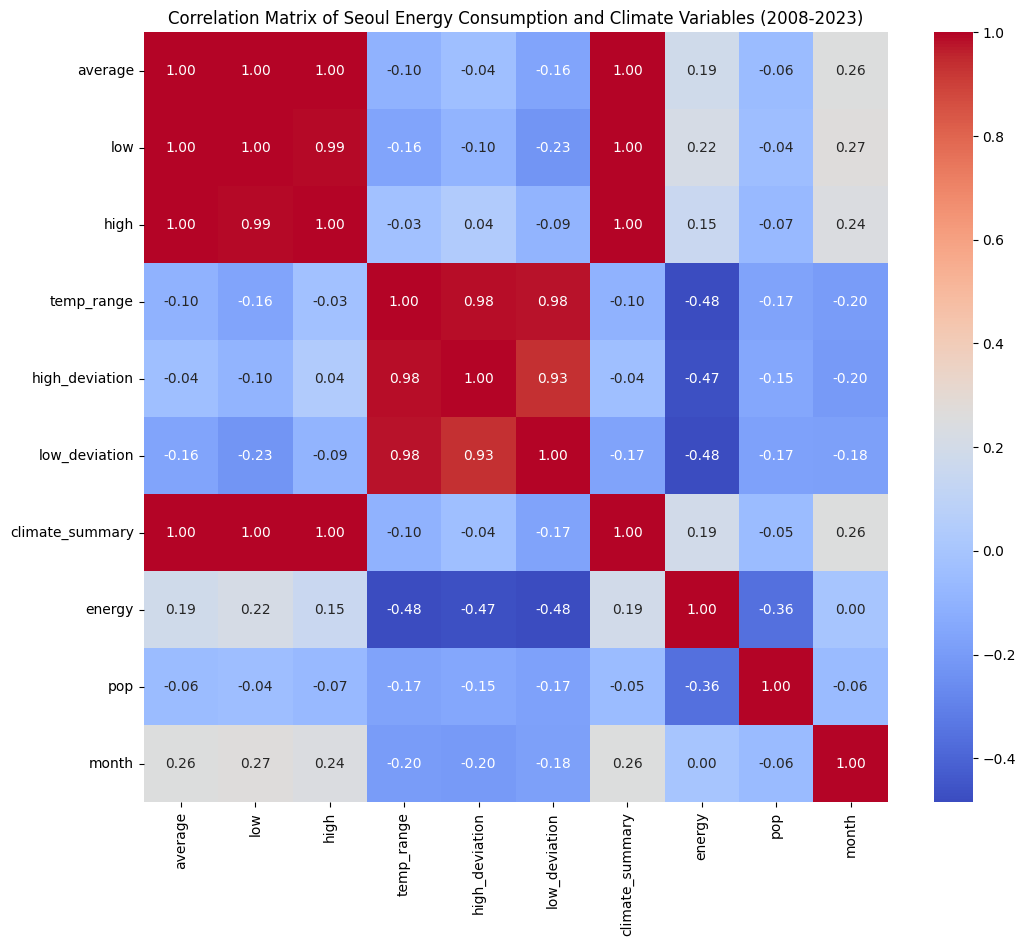

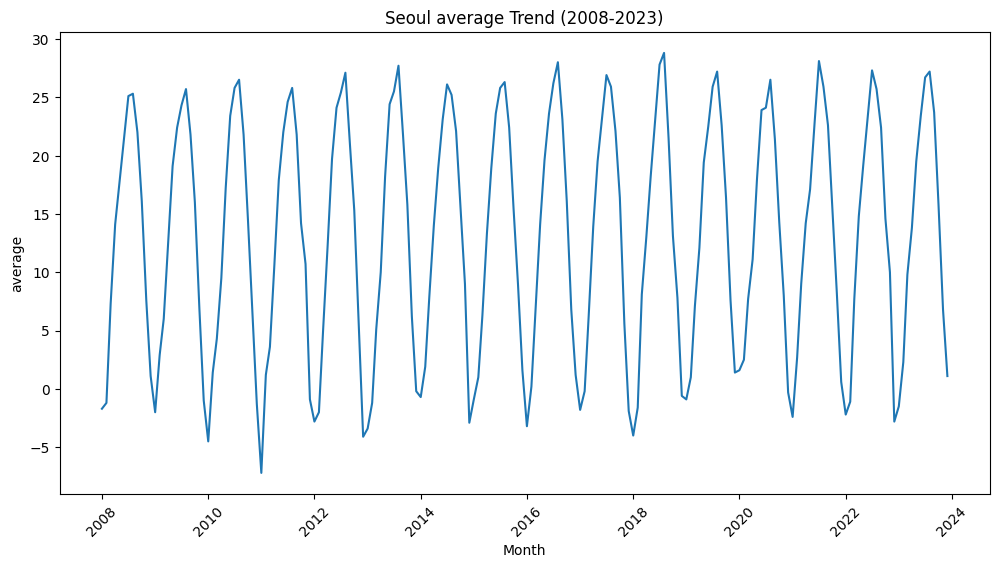

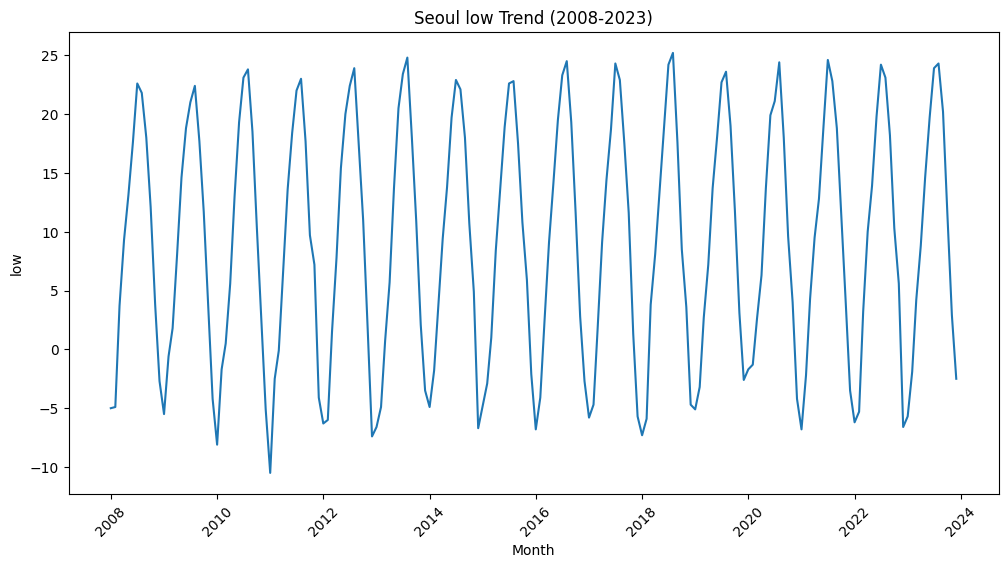

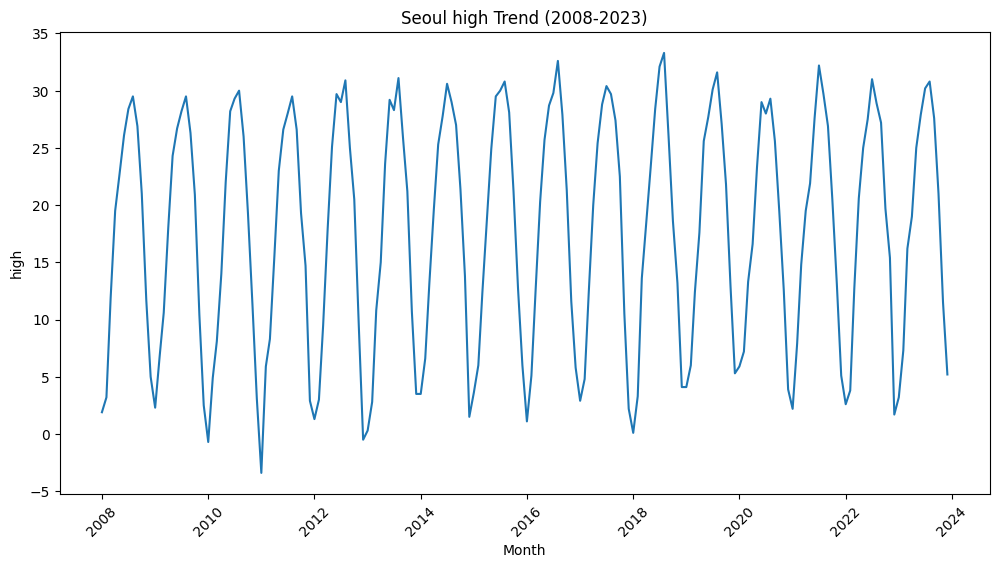

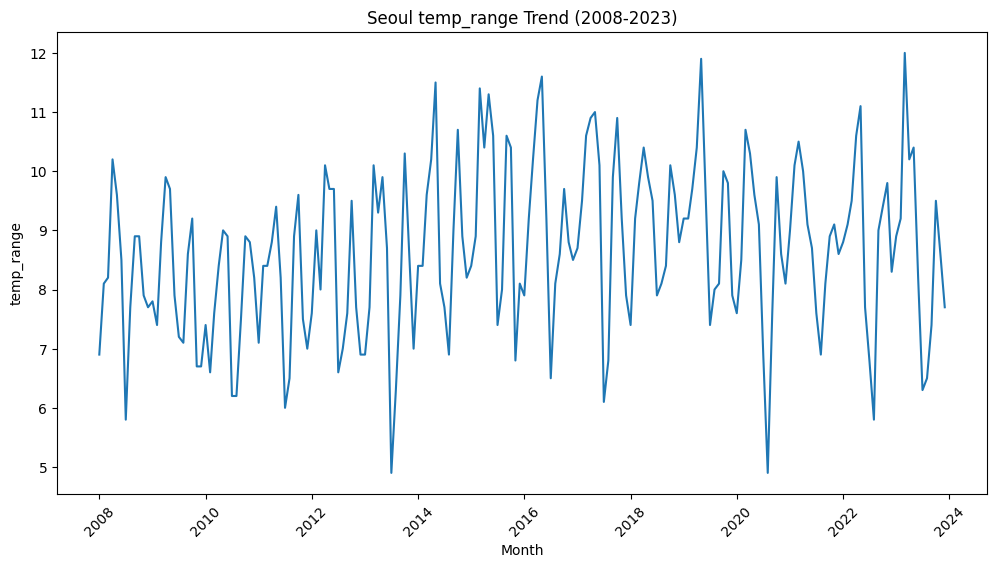

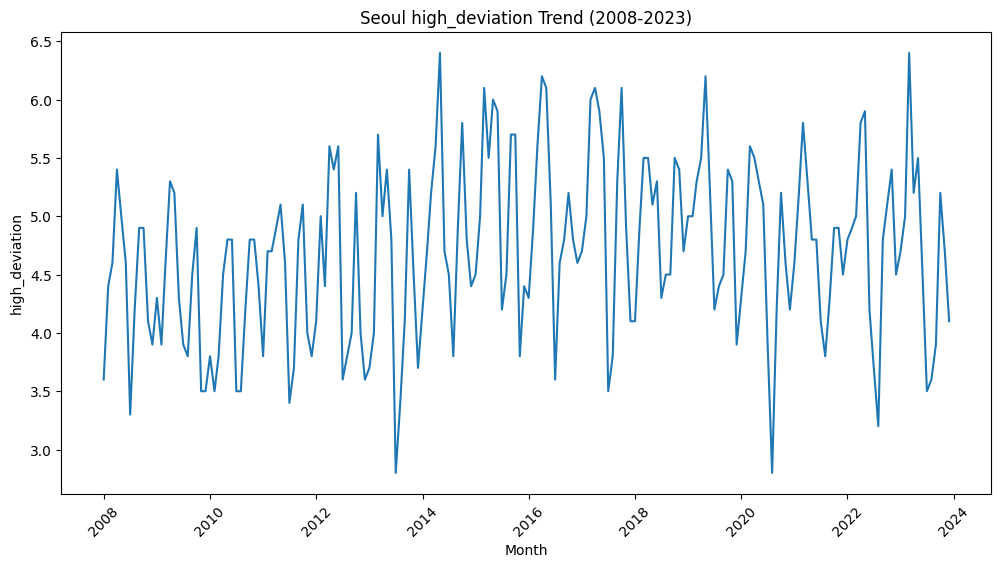

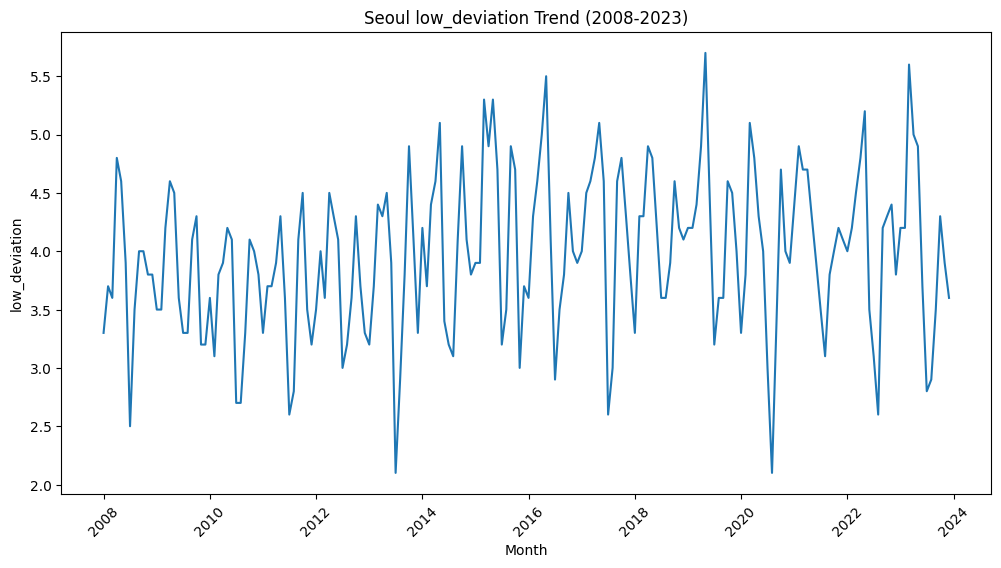

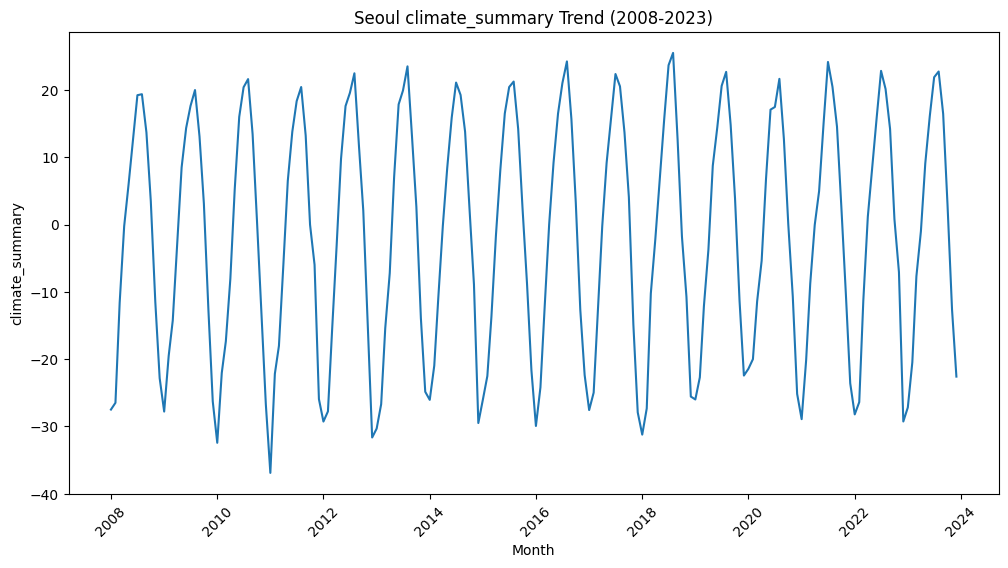

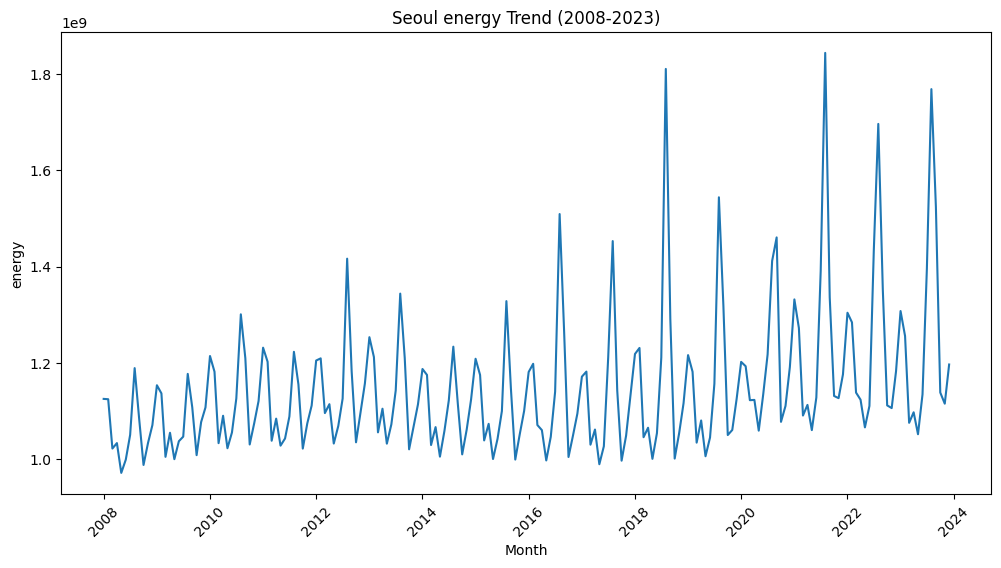

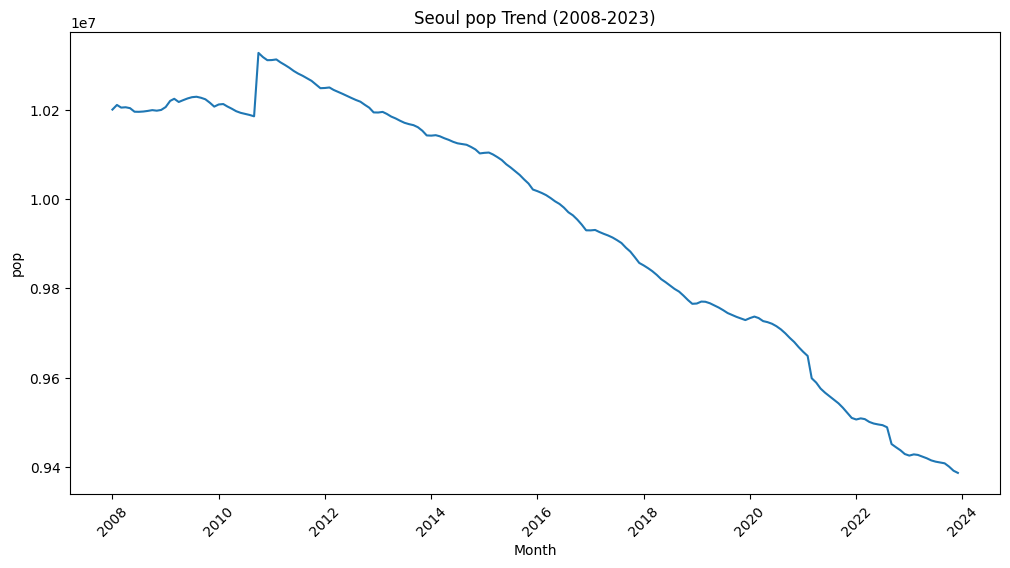

In [ ]:
# prompt: seoul_08 exploratory data analysis


# Descriptive Statistics
print(seoul_08.describe())

import matplotlib.pyplot as plt
import seaborn as sns
# Convert the 'ym' column to datetime objects
seoul_08['ym'] = pd.to_datetime(seoul_08['ym'].str.strip(), format='%Y-%m')

# Extract the month as a numerical feature for correlation analysis
seoul_08['month'] = seoul_08['ym'].dt.month

# Correlation Matrix (excluding the original 'ym' column)
correlation_matrix = seoul_08.drop(columns=['ym']).corr()  # Exclude 'ym'
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Seoul Energy Consumption and Climate Variables (2008-2023)')
plt.show()

# Time Series Plots for all variables in seoul_08
for column in seoul_08.columns:
  if column not in ['ym', 'month']:  # Exclude 'ym' and 'month' columns
    plt.figure(figsize=(12, 6))
    plt.plot(seoul_08['ym'], seoul_08[column])
    plt.xlabel('Month')
    plt.ylabel(column)
    plt.title(f'Seoul {column} Trend (2008-2023)')
    plt.xticks(rotation=45)
    plt.show()


          average         low        high  temp_range  high_deviation  \
count  192.000000  192.000000  192.000000  192.000000      192.000000   
mean    15.245312   11.995833   19.399479    7.403646        4.154167   
std      7.819232    8.359224    7.326724    1.277980        0.657843   
min     -0.700000   -4.800000    4.600000    4.500000        2.700000   
25%      7.875000    4.475000   12.275000    6.300000        3.675000   
50%     15.750000   12.450000   20.300000    7.650000        4.200000   
75%     22.025000   19.500000   25.525000    8.500000        4.700000   
max     28.000000   25.600000   32.100000    9.900000        5.400000   

       low_deviation  climate_summary        energy           pop  
count     192.000000       192.000000  1.920000e+02  1.920000e+02  
mean        3.249479         2.122413  3.923765e+08  3.477111e+06  
std         0.645402        13.618114  4.862917e+07  8.345637e+04  
min         1.800000       -25.434504  3.226150e+08  3.293362e+06  
25

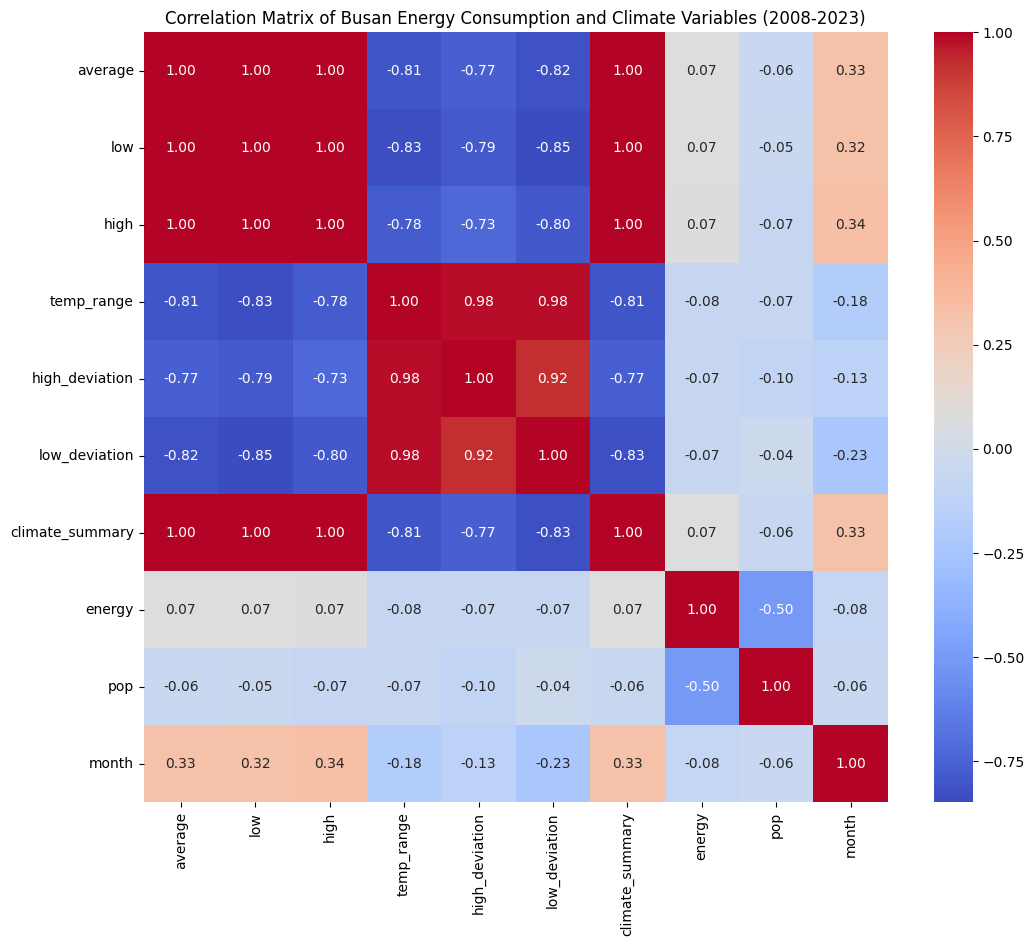

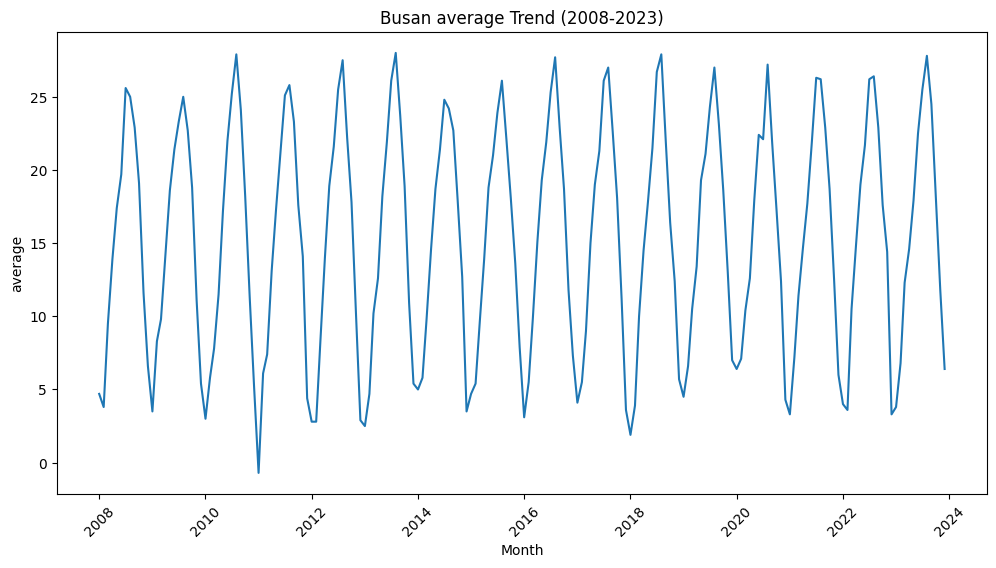

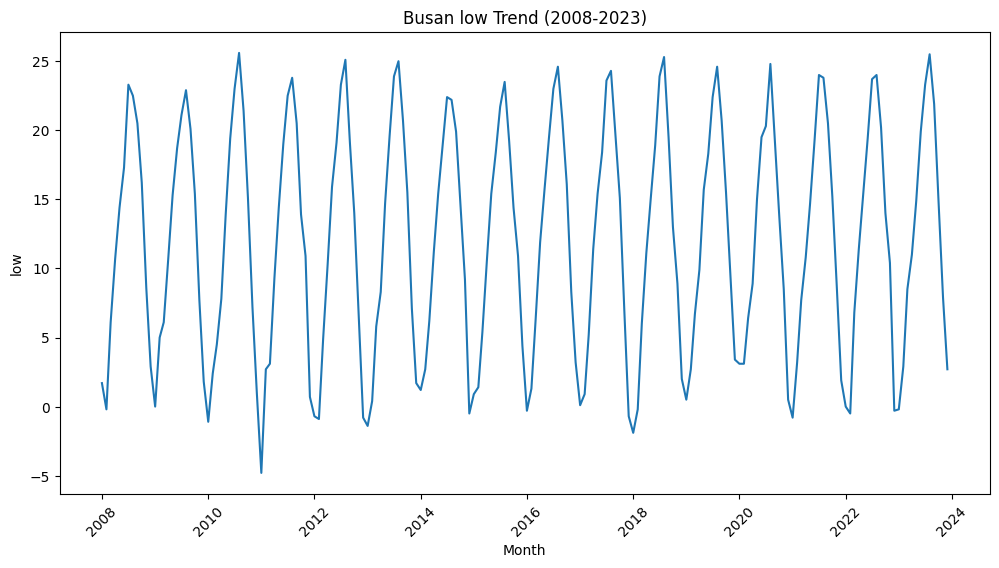

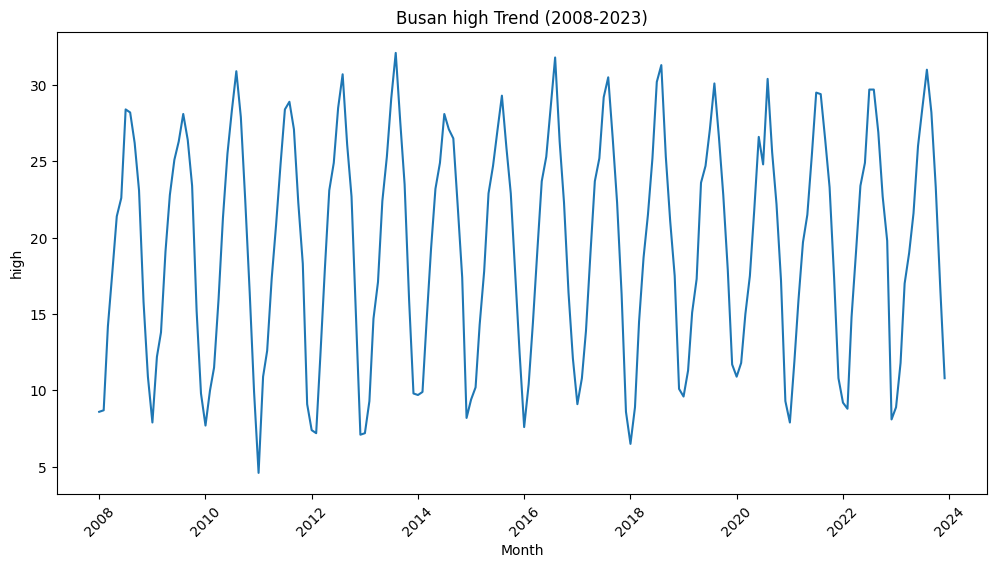

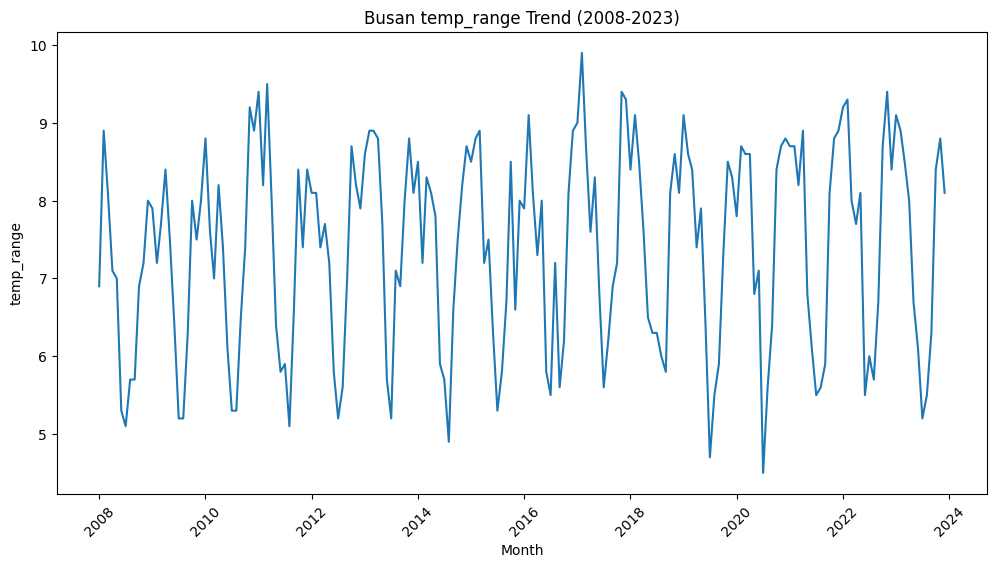

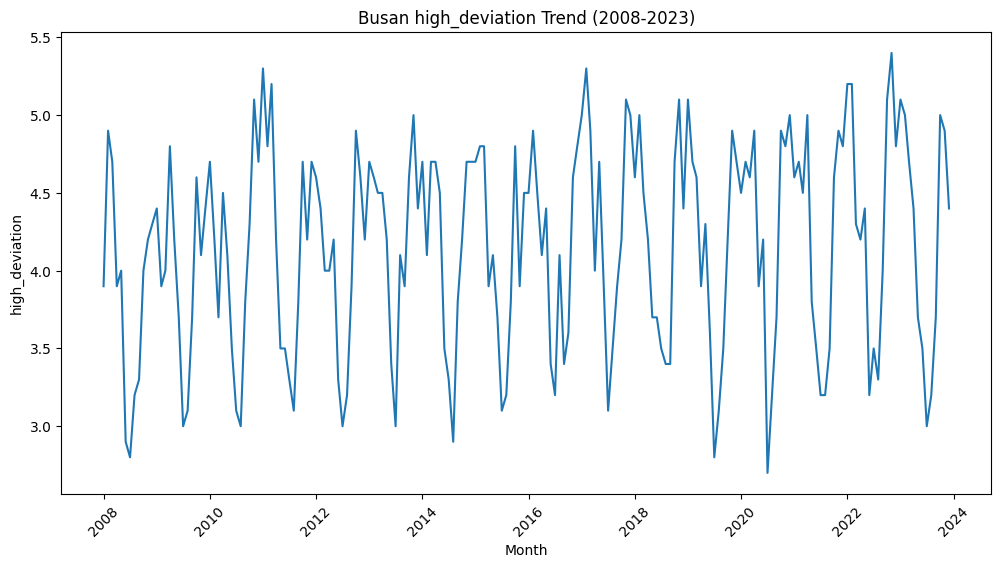

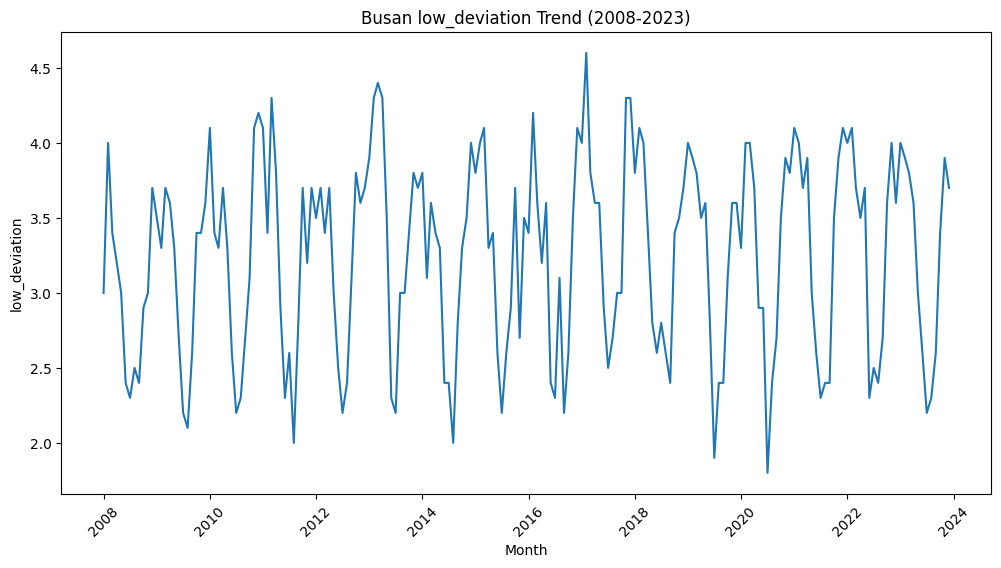

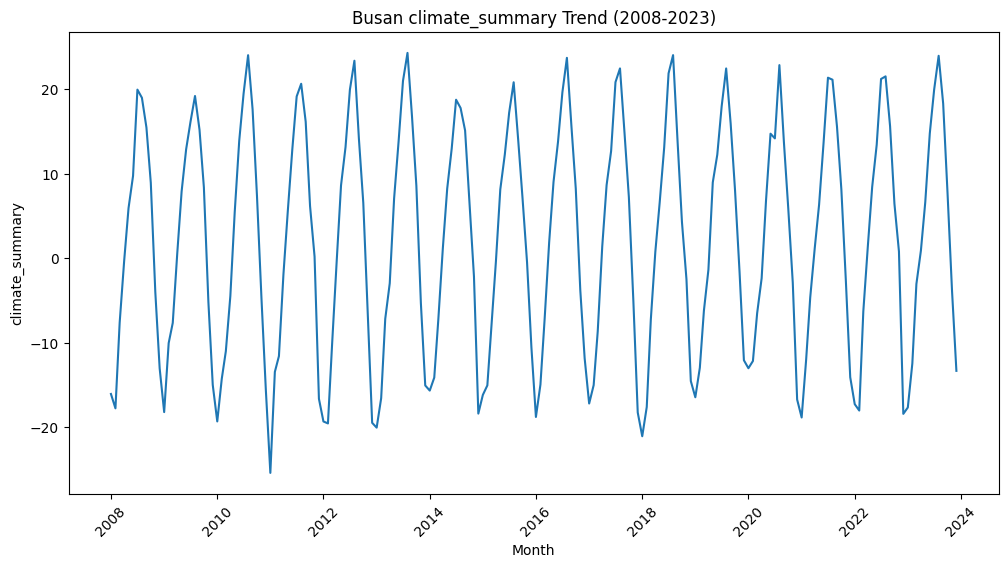

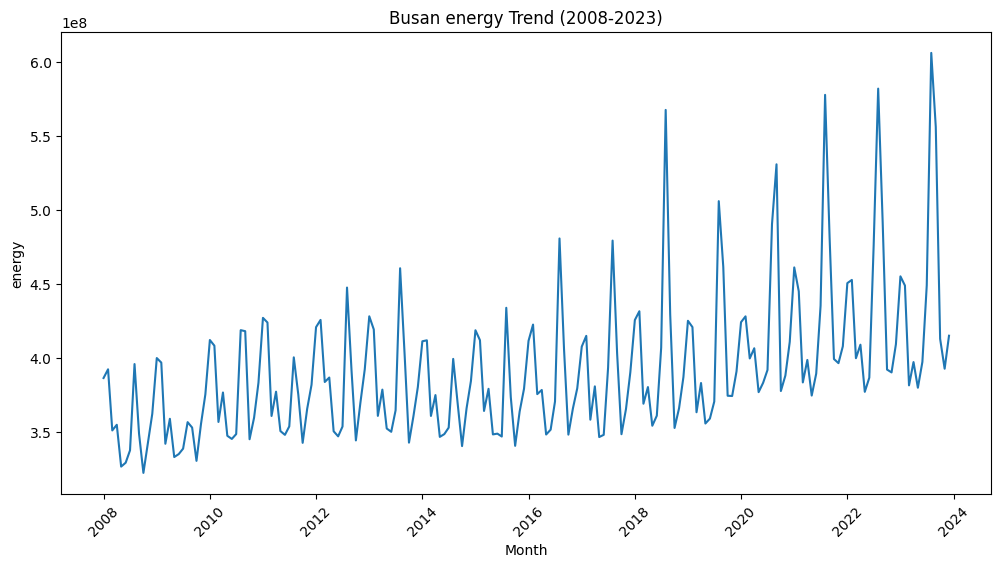

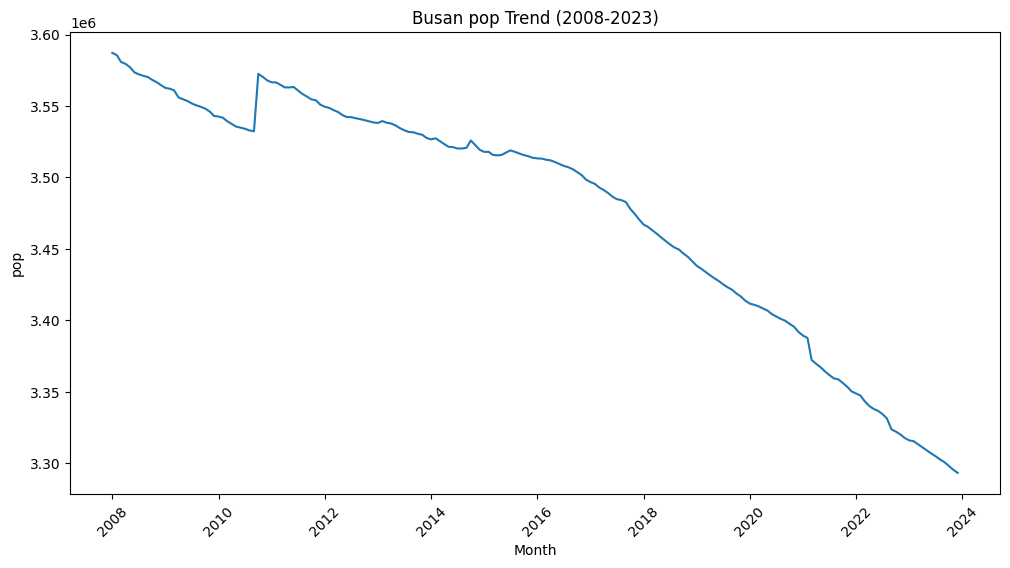

In [ ]:
# prompt: busan_08 exploratory data analysis

# Descriptive Statistics
print(busan_08.describe())

import matplotlib.pyplot as plt
import seaborn as sns
# Convert the 'ym' column to datetime objects
busan_08['ym'] = pd.to_datetime(busan_08['ym'].str.strip(), format='%Y-%m')

# Extract the month as a numerical feature for correlation analysis
busan_08['month'] = busan_08['ym'].dt.month

# Correlation Matrix (excluding the original 'ym' column)
correlation_matrix = busan_08.drop(columns=['ym']).corr()  # Exclude 'ym'
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Busan Energy Consumption and Climate Variables (2008-2023)')
plt.show()



# Time Series Plots for all variables in busan_08
for column in busan_08.columns:
  if column not in ['ym', 'month']:  # Exclude 'ym' and 'month' columns
    plt.figure(figsize=(12, 6))
    plt.plot(busan_08['ym'], busan_08[column])
    plt.xlabel('Month')
    plt.ylabel(column)
    plt.title(f'Busan {column} Trend (2008-2023)')
    plt.xticks(rotation=45)
    plt.show()



In [ ]:
#부산, 서울 모두 2010년 10월 인구 통계가 뜀: 거주불명자(2010년 10월부터 통계포함)로 인한 것으로 보임. 거주불명자 인구 따로 제공 되지 않음